# Covid 19 Face Mask Detection

### **Importing the Libraries**

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### **Connecting Kaggle with Google Colaboratory**

In [1]:
import os       ## accessing the underlying operating system of the virtual machine on which this colab runs, that is available in the OS namespace.
os.environ['KAGGLE_USERNAME'] = 'samarthnigam43'
os.environ['KAGGLE_KEY'] = '19e2602e7134b333012cb09befd609a1'

### **Downloading the Dataset**

In [2]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 99% 205M/207M [00:05<00:00, 45.0MB/s]
100% 207M/207M [00:05<00:00, 39.8MB/s]


### **Unzipping the Dataset**


In [3]:
! unzip covid-face-mask-detection-dataset.zip         ##unzip the above downloaded dataset

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

### **Mapping Directories to the variables**

In [4]:
## set up our directories into a variabes, so now go ahead and define each of the directories
main_dir = '/content/New Masks Dataset'     ## variable for the main directory which is New Masks Dataset
test_dir=os.path.join(main_dir,'Test')        ## variable for the sub directory which is Test
train_dir=os.path.join(main_dir,'Train')        ## variable for the sub directory which is Train
valid_dir=os.path.join(main_dir,'Validation')        ## variable for the sub directory which is Validation
train_mask_dir=os.path.join(train_dir,'Mask')        ## variable for the sub directory under Train which is Mask
train_nomask_dir=os.path.join(train_dir,'Non Mask')        ## variable for the sub directory under Train which is Non Mask

### **Assigning all the file names of mask images to the Python list**

In [5]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])

['0267.jpg', '1553.jpg', '0787.jpg', '0150.jpg', '1234.jpg', '0779.jpg', '1637.jpg', '0037.jpg', '1041.jpg', '1137.jpg']


### **Assigning all the file names of no mask images to the Python list**

In [6]:
train_nomask_names = os.listdir(train_nomask_dir)
print(train_nomask_names[:10])

['169.jpg', '3.jpg', '99.jpg', '153.jpg', '258.jpg', '234.jpg', '283.jpg', '340.jpg', '232.jpg', '95.jpg']


### **Creates a grid of 4*4(16 images) where 8 will be of mask and 8 will be of no mask**

In [9]:
nrows = 4
ncols = 4
plt.figure(figsize = (12, 12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

### **Created an empty list 'mask_pic' which will store paths of 8 images with mask**

In [10]:
mask_pic = []
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir, i))
print(mask_pic)  

['/content/New Masks Dataset/Train/Mask/0267.jpg', '/content/New Masks Dataset/Train/Mask/1553.jpg', '/content/New Masks Dataset/Train/Mask/0787.jpg', '/content/New Masks Dataset/Train/Mask/0150.jpg', '/content/New Masks Dataset/Train/Mask/1234.jpg', '/content/New Masks Dataset/Train/Mask/0779.jpg', '/content/New Masks Dataset/Train/Mask/1637.jpg', '/content/New Masks Dataset/Train/Mask/0037.jpg']


### **Created an empty list 'nomask_pic' which will store paths of 8 images with nomask**

In [12]:
nomask_pic = []
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir, i))
print(nomask_pic)

['/content/New Masks Dataset/Train/Non Mask/169.jpg', '/content/New Masks Dataset/Train/Non Mask/3.jpg', '/content/New Masks Dataset/Train/Non Mask/99.jpg', '/content/New Masks Dataset/Train/Non Mask/153.jpg', '/content/New Masks Dataset/Train/Non Mask/258.jpg', '/content/New Masks Dataset/Train/Non Mask/234.jpg', '/content/New Masks Dataset/Train/Non Mask/283.jpg', '/content/New Masks Dataset/Train/Non Mask/340.jpg']


### **Create a new list which combine both lists created before**

In [13]:
merged_list = mask_pic + nomask_pic
print(merged_list)

['/content/New Masks Dataset/Train/Mask/0267.jpg', '/content/New Masks Dataset/Train/Mask/1553.jpg', '/content/New Masks Dataset/Train/Mask/0787.jpg', '/content/New Masks Dataset/Train/Mask/0150.jpg', '/content/New Masks Dataset/Train/Mask/1234.jpg', '/content/New Masks Dataset/Train/Mask/0779.jpg', '/content/New Masks Dataset/Train/Mask/1637.jpg', '/content/New Masks Dataset/Train/Mask/0037.jpg', '/content/New Masks Dataset/Train/Non Mask/169.jpg', '/content/New Masks Dataset/Train/Non Mask/3.jpg', '/content/New Masks Dataset/Train/Non Mask/99.jpg', '/content/New Masks Dataset/Train/Non Mask/153.jpg', '/content/New Masks Dataset/Train/Non Mask/258.jpg', '/content/New Masks Dataset/Train/Non Mask/234.jpg', '/content/New Masks Dataset/Train/Non Mask/283.jpg', '/content/New Masks Dataset/Train/Non Mask/340.jpg']


### **Displaying the 4*4 grid**

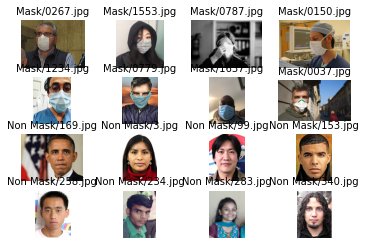

In [14]:
for i in range(0, len(merged_list)):
  data = merged_list[i].split('/', 4)[4]
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')
  image = mpimg.imread(merged_list[i])
  sp.imshow(image, cmap = 'gray')
  sp.set_title(data, fontsize = 10)
  
plt.show()

### **Image/Data Augmentation**

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255, zoom_range = 0.2, rotation_range = 40, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150,150), batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size = (150,150), batch_size=32, class_mode='binary')
valid_generator = validation_datagen.flow_from_directory(valid_dir, target_size = (150,150), batch_size=32, class_mode='binary')

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [16]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [17]:
train_generator.image_shape

(150, 150, 3)

### **Building the CNN(Convolutional Neural Network) Model**

In [18]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding = 'SAME', activation = 'relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3,3), padding = 'SAME', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

### **Compiling the CNN Model**

In [19]:
model.compile(Adam(learning_rate = 0.001), loss='binary_crossentropy', metrics=['accuracy'])

### **Training and Validating the CNN Model**

In [20]:
history=model.fit(train_generator, epochs=30, validation_data = valid_generator)

Epoch 1/30
19/19 [==============================] - 44s 753ms/step - loss: 5.2596 - accuracy: 0.5050 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/30
19/19 [==============================] - 13s 718ms/step - loss: 0.6762 - accuracy: 0.5250 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/30
19/19 [==============================] - 13s 727ms/step - loss: 0.6456 - accuracy: 0.5667 - val_loss: 0.6748 - val_accuracy: 0.7614
Epoch 4/30
19/19 [==============================] - 13s 718ms/step - loss: 0.4792 - accuracy: 0.7817 - val_loss: 0.5694 - val_accuracy: 0.6765
Epoch 5/30
19/19 [==============================] - 14s 720ms/step - loss: 0.3799 - accuracy: 0.8450 - val_loss: 0.4710 - val_accuracy: 0.8431
Epoch 6/30
19/19 [==============================] - 14s 737ms/step - loss: 0.3164 - accuracy: 0.8883 - val_loss: 0.3963 - val_accuracy: 0.8725
Epoch 7/30
19/19 [==============================] - 14s 732ms/step - loss: 0.2902 - accuracy: 0.8917 - val_loss: 0.3979 - val_accuracy: 0.8399

### **Plotting the graph of Training loss and Validation loss**

Text(0.5, 0, 'epoch')

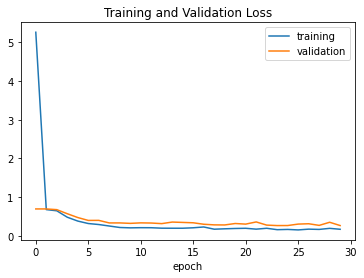

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')

### **Plotting the graph of Training accuracy and Validation accuracy**

Text(0.5, 0, 'epochs')

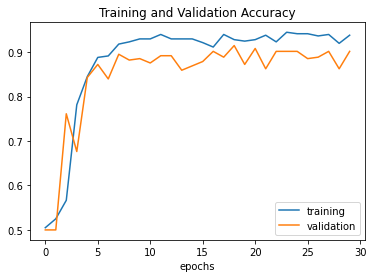

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epochs')

### **Calculating the loss and accuracy for Test Dataset**

In [23]:
test_loss, test_acc = model.evaluate(test_generator)
print('test_loss:{} test_acc:{}'.format(test_loss,test_acc))

4/4 [==============================] - 1s 294ms/step - loss: 0.1969 - accuracy: 0.9200
test_loss:0.1968725323677063 test_acc:0.9200000166893005


### **Uploading the image files from local machine for model to predict on static images. O for Mask and 1 for No Mask**

In [25]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for fname in uploaded.keys():
  img_path='/content/'+fname
  img=image.load_img(img_path, target_size=(150,150))
  images=image.img_to_array(img)
  images=np.expand_dims(images, axis=0)
  prediction=model.predict(images)
  print(fname)
  if prediction == 0:
    print('Mask')
  else:
    print('No Mask')

Saving sur.jpg to sur.jpg
sur.jpg
Mask


### **Saving the Model for future scope(OpenCV: Prediction on video streams)**

In [26]:
model.save('model.h5')